## Example of the `aitlas` toolbox in the context of crop type prediction

This notebook shows a sample implementation for crop type prediction using the `aitlas` toolbox and the Netherlands 2019 dataset.

In [2]:
import os

from aitlas.datasets import EOPatchCrops
from aitlas.models import LSTM
from aitlas.visualizations import display_eopatch_predictions

### Load the dataset

In [ ]:
dataset_config = {
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "batch_size": 128,
    "shuffle": True,
    "num_workers": 4,
    "regions":["train", "test", "val",],
}
dataset = EOPatchCrops(dataset_config)

### Visualize sample time series from the dataset

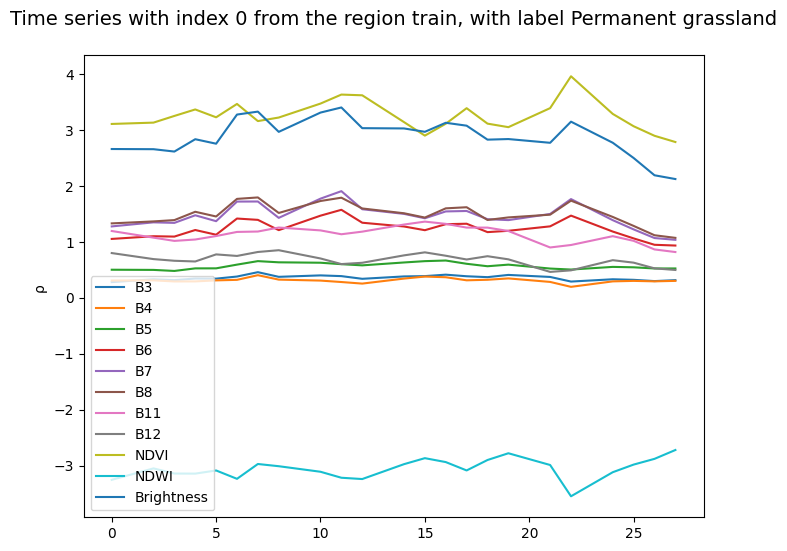

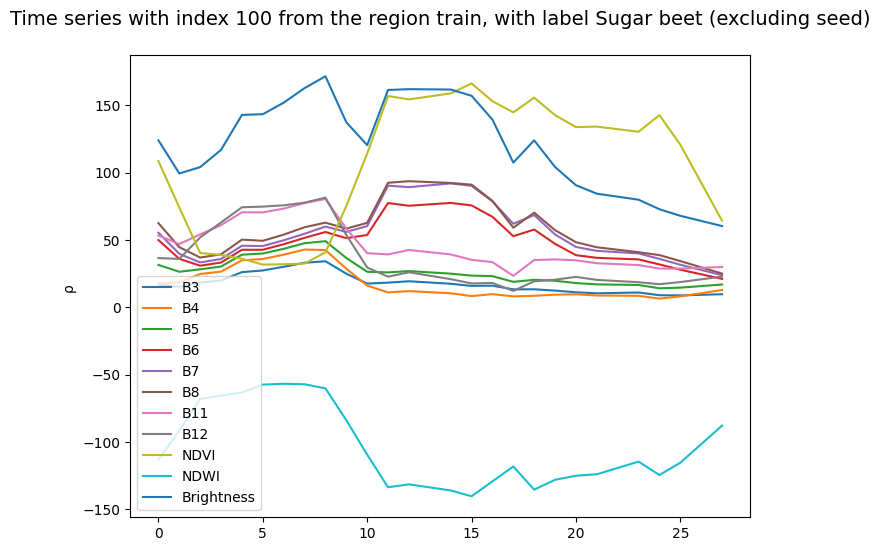

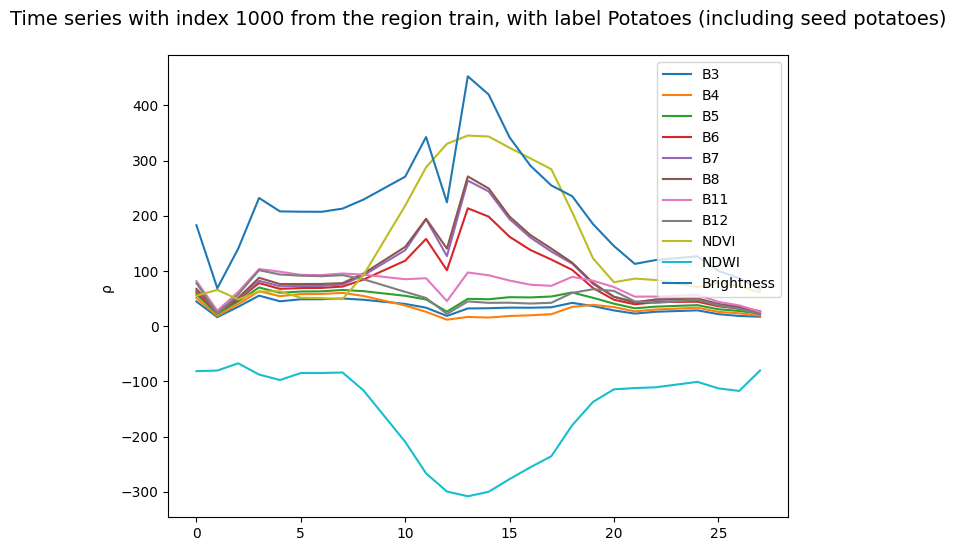

In [9]:
fig1 = dataset.show_timeseries(0)
fig2 = dataset.show_timeseries(100)
fig3 = dataset.show_timeseries(1000)

### Inspect the data

In [10]:
dataset.show_samples()

,id,path,eopatch,polygon_id,CODE_CULTU,sequencelength,classid,classname,region
0,0,eopatch_11173/1666071,eopatch_11173,1666071,J0000,0,0,Permanent grassland,train
1,1,eopatch_10137/1894170,eopatch_10137,1894170,J0000,0,0,Permanent grassland,train
2,2,eopatch_6711/1875243,eopatch_6711,1875243,J0000,0,0,Permanent grassland,train
3,3,eopatch_6590/1924836,eopatch_6590,1924836,G1000,0,1,Temporary grasses and grazings,train
4,4,eopatch_3731/2150854,eopatch_3731,2150854,NUAA+WA+FA9,0,6,Other farmland,train
5,5,eopatch_939/2018637,eopatch_939,2018637,NUAA+WA+FA9,0,6,Other farmland,train
6,6,eopatch_3999/1573533,eopatch_3999,1573533,G3000,0,2,Green maize,train
7,7,eopatch_9569/1709233,eopatch_9569,1709233,J0000,0,0,Permanent grassland,train
8,8,eopatch_2152/2286699,eopatch_2152,2286699,NUAA+WA+FA9,0,6,Other farmland,train
9,9,eopatch_10867/1620648,eopatch_10867,1620648,J0000,0,0,Permanent grassland,train


In [11]:
dataset.data_distribution_table()

,Label,Region,Number of parcels
0,Common winter wheat and spelt,test,3152
1,Common winter wheat and spelt,train,15467
2,Common winter wheat and spelt,val,2778
3,Flowers and ornamental plants (excluding nurse...,test,1055
4,Flowers and ornamental plants (excluding nurse...,train,5143
5,Flowers and ornamental plants (excluding nurse...,val,911
6,Green maize,test,6841
7,Green maize,train,32271
8,Green maize,val,5614
9,Onions,test,1136


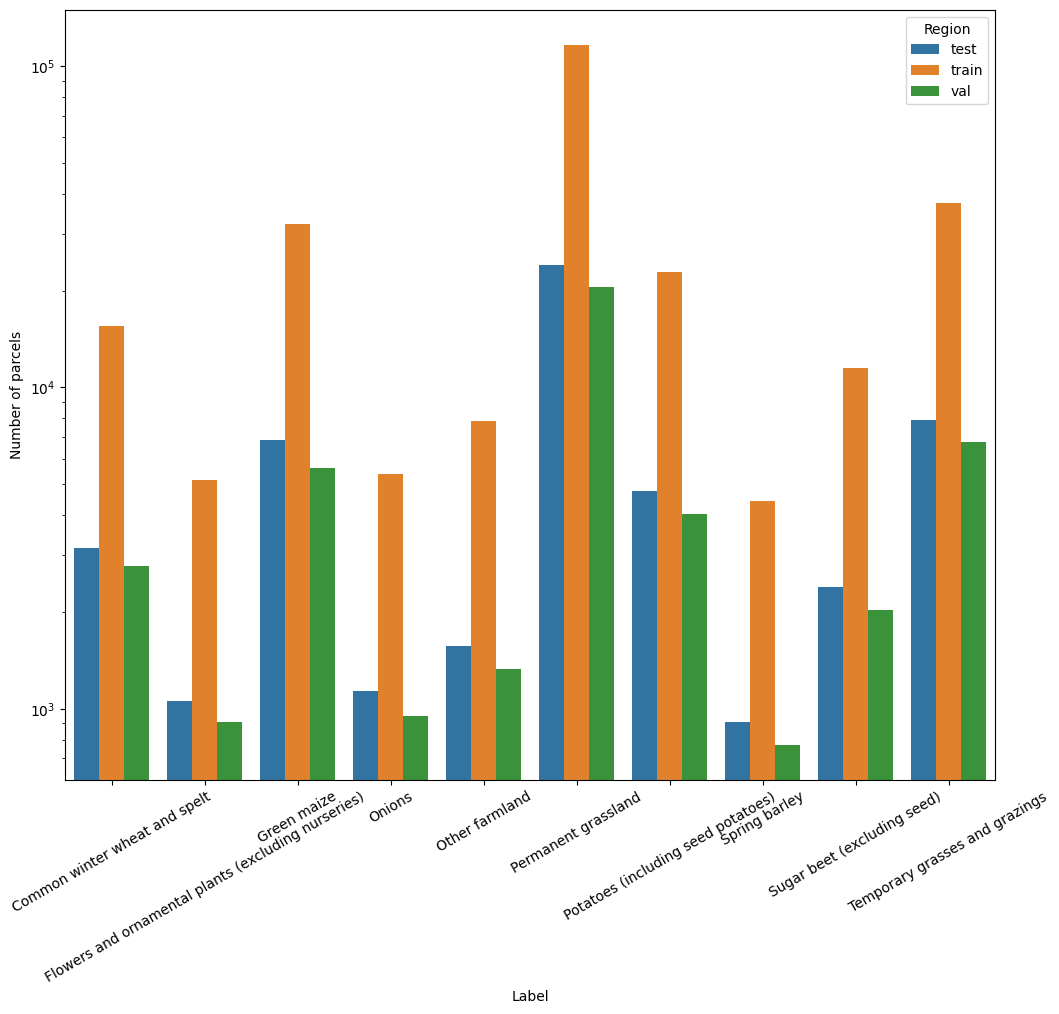

In [12]:
fig = dataset.data_distribution_barchart()

### Load train and validation splits

In [13]:
train_dataset_config = {
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "batch_size": 128,
    "shuffle": True,
    "num_workers": 4,
    "regions":["train", ],
}

train_dataset = EOPatchCrops(train_dataset_config)

validation_dataset_config = {
    "batch_size": 32,
    "shuffle": False,
    "num_workers": 4,
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "regions":["val", ],
}

validation_dataset = EOPatchCrops(validation_dataset_config)
len(train_dataset), len(validation_dataset)

(258893, 45687)

### Setup and create the model for training

In [14]:
epochs = 100
model_directory = "./experiments/LSTM"
model_config = {
    "input_dim":11,
    "num_classes": 10, 
    "learning_rate": 0.001,
    "dropout" : 0.2,
    "metrics":["accuracy","f1_score", "kappa"]
}
model = LSTM(model_config)
model.prepare()

### Training and validation

In [48]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=validation_dataset,
    run_id='notebook-1',
)

2022-10-22 16:50:58,583 INFO Starting training.
training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:50<00:00, 39.96it/s]
2022-10-22 16:51:51,706 INFO epoch: 1, time: 50, loss:  0.61792
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.03it/s]
2022-10-22 16:52:49,505 INFO Accuracy:0.8045022461016713, F1_score Micro:0.8045022461016713, F1_score Macro:0.770253647116146, F1_score Weighted:0.7620364051888263, F1_score per Class:[0.83893889 0.16992082 0.94570576 0.93458775 0.94776759 0.91861926
 0.48645197 0.89334432 0.6910259  0.87617421], Kappa metric:tensor(0.7203, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:35<00:00, 40.47it/s]
2022-10-22 16:53:24,799 INFO Accuracy:0.8028104274738985, F1_score Micro:0.8028104274738985, F1_score Macro:0.7714577778042192, F1_score Weighted:0.7599376451576677, F1_score per

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.80it/s]
2022-10-22 16:54:13,204 INFO epoch: 2, time: 49, loss:  0.50368
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.88it/s]
2022-10-22 16:55:11,210 INFO Accuracy:0.8130308660334579, F1_score Micro:0.8130308660334579, F1_score Macro:0.7896669783814797, F1_score Weighted:0.7705220474909638, F1_score per Class:[0.84361663 0.17310643 0.95185109 0.94075726 0.94924689 0.92841221
 0.56973739 0.90509364 0.74932976 0.88551848], Kappa metric:tensor(0.7328, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.85it/s]
2022-10-22 16:55:49,969 INFO Accuracy:0.8099240484163985, F1_score Micro:0.8099240484163986, F1_score Macro:0.7882883602658526, F1_score Weighted:0.766997433127455, F1_score per Class:[0.84140682 0.17323836 0.94969236 0.93988

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.45it/s]
2022-10-22 16:59:02,551 INFO epoch: 4, time: 48, loss:  0.44693
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.18it/s]
2022-10-22 17:00:00,057 INFO Accuracy:0.8436883191125291, F1_score Micro:0.843688319112529, F1_score Macro:0.8497972674857586, F1_score Weighted:0.8337347618085632, F1_score per Class:[0.85850325 0.51154165 0.95250384 0.95334045 0.95806887 0.95342848
 0.63608656 0.94433818 0.83182787 0.89833352], Kappa metric:tensor(0.7838, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.85it/s]
2022-10-22 17:00:38,818 INFO Accuracy:0.8390570621839911, F1_score Micro:0.8390570621839911, F1_score Macro:0.843679641444637, F1_score Weighted:0.8288701445045897, F1_score per Class:[0.85577141 0.50647821 0.94886514 0.950914

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.55it/s]
2022-10-22 17:03:49,631 INFO epoch: 6, time: 47, loss:  0.41866
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:55<00:00, 36.52it/s]
2022-10-22 17:04:45,029 INFO Accuracy:0.8475818195161707, F1_score Micro:0.8475818195161707, F1_score Macro:0.8584359743950871, F1_score Weighted:0.8418210106908119, F1_score per Class:[0.85931079 0.55170429 0.9607763  0.95473541 0.95813079 0.95589008
 0.64006316 0.94299354 0.84087001 0.91988539], Kappa metric:tensor(0.7910, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:36<00:00, 39.01it/s]
2022-10-22 17:05:21,648 INFO Accuracy:0.8429312495895988, F1_score Micro:0.8429312495895988, F1_score Macro:0.8498161772554103, F1_score Weighted:0.8370116493893556, F1_score per Class:[0.85653589 0.54952671 0.95771594 0.9537

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.34it/s]
2022-10-22 17:08:33,287 INFO epoch: 8, time: 48, loss:  0.39723
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.00it/s]
2022-10-22 17:09:31,087 INFO Accuracy:0.8551988659407554, F1_score Micro:0.8551988659407553, F1_score Macro:0.8601380053520835, F1_score Weighted:0.8392858658978354, F1_score per Class:[0.8700035  0.48239604 0.96400675 0.96033101 0.96304015 0.95794022
 0.6637744  0.94886364 0.85857003 0.93245431], Kappa metric:tensor(0.7976, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 37.18it/s]
2022-10-22 17:10:09,508 INFO Accuracy:0.847396414735045, F1_score Micro:0.8473964147350451, F1_score Macro:0.8470310140692441, F1_score Weighted:0.8311673194149306, F1_score per Class:[0.86534431 0.47422471 0.95900755 0.95475

testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 37.19it/s]
2022-10-22 17:12:32,624 INFO Accuracy:0.8547289163219296, F1_score Micro:0.8547289163219296, F1_score Macro:0.8619990057119173, F1_score Weighted:0.8473033913230553, F1_score per Class:[0.86842345 0.56509938 0.95892135 0.95730337 0.95862069 0.94798275
 0.6489083  0.94015234 0.86017897 0.91439947], Kappa metric:tensor(0.7996, dtype=torch.float64)
training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:46<00:00, 43.07it/s]
2022-10-22 17:13:19,600 INFO epoch: 10, time: 47, loss:  0.37609
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.08it/s]
2022-10-22 17:14:17,279 INFO Accuracy:0.8665124201890356, F1_score Micro:0.8665124201890355, F1_score Macro:0.879323595694285, F1_score Weighted:0.8620452238985987, F1_score per Class:[0.8737014  0.61131728 0.96681074 0.9673

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.34it/s]
2022-10-22 17:20:33,239 INFO epoch: 13, time: 48, loss:  0.34923
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.00it/s]
2022-10-22 17:21:31,043 INFO Accuracy:0.8775362794668068, F1_score Micro:0.8775362794668068, F1_score Macro:0.8910827964800732, F1_score Weighted:0.8710393771953477, F1_score per Class:[0.88389889 0.62301207 0.96751866 0.97116089 0.97184526 0.97118004
 0.69453629 0.95322121 0.92493897 0.94951567], Kappa metric:tensor(0.8310, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.53it/s]
2022-10-22 17:22:10,142 INFO Accuracy:0.8581653424387682, F1_score Micro:0.8581653424387682, F1_score Macro:0.8616652159803296, F1_score Weighted:0.8506804019308813, F1_score per Class:[0.87145493 0.58251919 0.95628123 0.958

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.78it/s]
2022-10-22 17:25:21,044 INFO epoch: 15, time: 48, loss:  0.32951
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:56<00:00, 35.84it/s]
2022-10-22 17:26:17,502 INFO Accuracy:0.8827353385375425, F1_score Micro:0.8827353385375425, F1_score Macro:0.9042473074606587, F1_score Weighted:0.8796239250387374, F1_score per Class:[0.88420532 0.65859261 0.97171236 0.97546039 0.97460906 0.97374995
 0.74289985 0.96587537 0.93493318 0.96043498], Kappa metric:tensor(0.8400, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 37.08it/s]
2022-10-22 17:26:56,022 INFO Accuracy:0.8561297524459912, F1_score Micro:0.8561297524459912, F1_score Macro:0.8650725219759854, F1_score Weighted:0.852195873246475, F1_score per Class:[0.86592831 0.60358469 0.95863921 0.9589

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.45it/s]
2022-10-22 17:30:08,292 INFO epoch: 17, time: 48, loss:  0.31102
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.83it/s]
2022-10-22 17:31:06,376 INFO Accuracy:0.8877489928271526, F1_score Micro:0.8877489928271526, F1_score Macro:0.9077310589523812, F1_score Weighted:0.8776759788397561, F1_score per Class:[0.89261695 0.60072414 0.97478283 0.97482187 0.9785349  0.9783565
 0.7843247  0.97577134 0.95096671 0.96641064], Kappa metric:tensor(0.8441, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.69it/s]
2022-10-22 17:31:45,301 INFO Accuracy:0.8555825508350297, F1_score Micro:0.8555825508350297, F1_score Macro:0.8595480923675989, F1_score Weighted:0.8426398711722878, F1_score per Class:[0.87130303 0.5202934  0.96007912 0.9547

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 42.01it/s]
2022-10-22 17:37:23,321 INFO epoch: 20, time: 48, loss:  0.28422
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.06it/s]
2022-10-22 17:38:21,030 INFO Accuracy:0.9043929345327992, F1_score Micro:0.9043929345327993, F1_score Macro:0.926118928486303, F1_score Weighted:0.8995985584444001, F1_score per Class:[0.905409   0.69111487 0.97802077 0.98298877 0.98044848 0.98113042
 0.8261979  0.98213278 0.96376102 0.96998528], Kappa metric:tensor(0.8684, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.43it/s]
2022-10-22 17:39:00,241 INFO Accuracy:0.8571147153457219, F1_score Micro:0.8571147153457219, F1_score Macro:0.8637943271170041, F1_score Weighted:0.8494234911894518, F1_score per Class:[0.87098096 0.56691105 0.95849534 0.9599

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.40it/s]
2022-10-22 17:42:11,838 INFO epoch: 22, time: 47, loss:  0.26791
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.04it/s]
2022-10-22 17:43:09,582 INFO Accuracy:0.9159652829547342, F1_score Micro:0.9159652829547342, F1_score Macro:0.9392891804434595, F1_score Weighted:0.9138754536455079, F1_score per Class:[0.91396398 0.74746165 0.9809743  0.98388341 0.98485046 0.9831638
 0.86193704 0.9839804  0.9725824  0.98009435], Kappa metric:tensor(0.8853, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.63it/s]
2022-10-22 17:43:48,580 INFO Accuracy:0.8589970888874296, F1_score Micro:0.8589970888874298, F1_score Macro:0.8698432381594048, F1_score Weighted:0.854479313392301, F1_score per Class:[0.86972869 0.60024969 0.95995681 0.95808

testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.88it/s]
2022-10-22 17:50:04,790 INFO Accuracy:0.9249149262436606, F1_score Micro:0.9249149262436606, F1_score Macro:0.9458402190284863, F1_score Weighted:0.9224216296660501, F1_score per Class:[0.92319371 0.76883046 0.98274726 0.98555448 0.98609933 0.98641221
 0.8798242  0.98615689 0.97502458 0.98455908], Kappa metric:tensor(0.8972, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 37.00it/s]
2022-10-22 17:50:43,396 INFO Accuracy:0.8578151334077527, F1_score Micro:0.8578151334077527, F1_score Macro:0.8652786069848581, F1_score Weighted:0.8518242780265709, F1_score per Class:[0.86993662 0.58839661 0.95826166 0.95708261 0.96174863 0.94983778
 0.6644039  0.93783494 0.85353812 0.91174519], Kappa metric:tensor(0.8047, dtype=torch.float64)
training: 100%|███████████████████████████████████████████████

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.94it/s]
2022-10-22 17:53:54,416 INFO epoch: 27, time: 47, loss:  0.23359
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.97it/s]
2022-10-22 17:54:52,274 INFO Accuracy:0.9252548350090578, F1_score Micro:0.9252548350090577, F1_score Macro:0.9499131201890016, F1_score Weighted:0.925819037363382, F1_score per Class:[0.92005859 0.79875708 0.98330491 0.98616801 0.98575944 0.98524115
 0.89316964 0.98646108 0.97581121 0.98440009], Kappa metric:tensor(0.8994, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:37<00:00, 37.78it/s]
2022-10-22 17:55:30,082 INFO Accuracy:0.8476152953794296, F1_score Micro:0.8476152953794296, F1_score Macro:0.8640719657271054, F1_score Weighted:0.847703834404195, F1_score per Class:[0.85297597 0.61443752 0.96075608 0.95729

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 42.12it/s]
2022-10-22 17:58:38,531 INFO epoch: 29, time: 48, loss:  0.21913
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.06it/s]
2022-10-22 17:59:36,229 INFO Accuracy:0.9396855071400154, F1_score Micro:0.9396855071400154, F1_score Macro:0.9577370187762089, F1_score Weighted:0.9385086115003751, F1_score per Class:[0.93716516 0.82390084 0.98497794 0.98734233 0.98725429 0.98696724
 0.91999486 0.98594737 0.97947908 0.98434107], Kappa metric:tensor(0.9180, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.77it/s]
2022-10-22 18:00:15,069 INFO Accuracy:0.8564361853481297, F1_score Micro:0.8564361853481297, F1_score Macro:0.8672480807084744, F1_score Weighted:0.8522373744042643, F1_score per Class:[0.86713124 0.59526381 0.95900242 0.960

testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.43it/s]
2022-10-22 18:07:29,732 INFO Accuracy:0.8545756998708605, F1_score Micro:0.8545756998708605, F1_score Macro:0.864482490341007, F1_score Weighted:0.8496539266767577, F1_score per Class:[0.86567164 0.58921024 0.95825444 0.95287187 0.96116682 0.95209431
 0.65941714 0.94697375 0.85066372 0.90850097], Kappa metric:tensor(0.8011, dtype=torch.float64)
training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.27it/s]
2022-10-22 18:08:17,598 INFO epoch: 33, time: 48, loss:  0.19973
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.00it/s]
2022-10-22 18:09:15,406 INFO Accuracy:0.9416824711367244, F1_score Micro:0.9416824711367244, F1_score Macro:0.9589374141034532, F1_score Weighted:0.9401110642721646, F1_score per Class:[0.93996746 0.82467126 0.98480186 0.9868

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.17it/s]
2022-10-22 18:15:28,513 INFO epoch: 36, time: 48, loss:  0.18650
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.70it/s]
2022-10-22 18:16:26,819 INFO Accuracy:0.9534324991405716, F1_score Micro:0.9534324991405716, F1_score Macro:0.9674474874030814, F1_score Weighted:0.9534446025235792, F1_score per Class:[0.95032995 0.87988544 0.98602945 0.98774521 0.98770345 0.98754495
 0.93794765 0.98871332 0.98137255 0.98720293], Kappa metric:tensor(0.9372, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.85it/s]
2022-10-22 18:17:05,580 INFO Accuracy:0.8477685118304988, F1_score Micro:0.8477685118304988, F1_score Macro:0.8644504241586626, F1_score Weighted:0.8470180651590931, F1_score per Class:[0.85547858 0.60293558 0.95720477 0.958

testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.60it/s]
2022-10-22 18:24:18,690 INFO Accuracy:0.8438286602315758, F1_score Micro:0.8438286602315758, F1_score Macro:0.8617712006205889, F1_score Weighted:0.8443399333353797, F1_score per Class:[0.84964281 0.6061598  0.95827338 0.95712688 0.95928753 0.94763217
 0.63905748 0.93934514 0.85922602 0.90196078], Kappa metric:tensor(0.7901, dtype=torch.float64)
training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.90it/s]
2022-10-22 18:25:06,982 INFO epoch: 40, time: 48, loss:  0.16926
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.03it/s]
2022-10-22 18:26:04,741 INFO Accuracy:0.9571753581595486, F1_score Micro:0.9571753581595486, F1_score Macro:0.9689750370203012, F1_score Weighted:0.9565584845512402, F1_score per Class:[0.95522983 0.88431626 0.98635837 0.988

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.78it/s]
2022-10-22 18:32:20,550 INFO epoch: 43, time: 47, loss:  0.15812
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:56<00:00, 35.80it/s]
2022-10-22 18:33:17,062 INFO Accuracy:0.9642323276411491, F1_score Micro:0.9642323276411491, F1_score Macro:0.9738665528766027, F1_score Weighted:0.964069786644422, F1_score per Class:[0.96227971 0.91076609 0.98664577 0.98790456 0.9883205  0.98799103
 0.96099884 0.98786568 0.9795639  0.98632946], Kappa metric:tensor(0.9516, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:37<00:00, 38.59it/s]
2022-10-22 18:33:54,073 INFO Accuracy:0.8501324227898527, F1_score Micro:0.8501324227898527, F1_score Macro:0.8631942804964675, F1_score Weighted:0.847404456878742, F1_score per Class:[0.8597584  0.58978845 0.95908435 0.95965

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.81it/s]
2022-10-22 18:37:06,953 INFO epoch: 45, time: 48, loss:  0.15240
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.89it/s]
2022-10-22 18:38:04,949 INFO Accuracy:0.96479626718374, F1_score Micro:0.96479626718374, F1_score Macro:0.9744467129156508, F1_score Weighted:0.9645616405347194, F1_score per Class:[0.96293845 0.91117622 0.98681343 0.98811702 0.98838802 0.98832719
 0.96118154 0.98843224 0.98153451 0.9875585 ], Kappa metric:tensor(0.9523, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.74it/s]
2022-10-22 18:38:43,822 INFO Accuracy:0.8527371024580296, F1_score Micro:0.8527371024580296, F1_score Macro:0.8650909133494313, F1_score Weighted:0.8488610900368347, F1_score per Class:[0.86287407 0.58737628 0.95885478 0.9598303

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.15it/s]
2022-10-22 18:41:56,683 INFO epoch: 47, time: 48, loss:  0.14605
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.92it/s]
2022-10-22 18:42:54,621 INFO Accuracy:0.9663335818272414, F1_score Micro:0.9663335818272414, F1_score Macro:0.9760120600483134, F1_score Weighted:0.9665149883660864, F1_score per Class:[0.96392006 0.92061155 0.98702071 0.98771142 0.98855223 0.98798997
 0.96582196 0.98851873 0.98275352 0.98722045], Kappa metric:tensor(0.9547, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.47it/s]
2022-10-22 18:43:33,791 INFO Accuracy:0.8452732724845142, F1_score Micro:0.8452732724845141, F1_score Macro:0.8643146582248322, F1_score Weighted:0.8454038052837847, F1_score per Class:[0.85218103 0.60041195 0.95875919 0.956

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.30it/s]
2022-10-22 18:49:10,930 INFO epoch: 50, time: 47, loss:  0.13779
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.06it/s]
2022-10-22 18:50:08,642 INFO Accuracy:0.9677820566797867, F1_score Micro:0.9677820566797867, F1_score Macro:0.9755550948479493, F1_score Weighted:0.9676977659479764, F1_score per Class:[0.96612523 0.92430793 0.98701787 0.98721092 0.9881678  0.98831386
 0.95637902 0.9889056  0.98320401 0.98591872], Kappa metric:tensor(0.9565, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.45it/s]
2022-10-22 18:50:47,827 INFO Accuracy:0.8492131240834373, F1_score Micro:0.8492131240834373, F1_score Macro:0.8629161833475785, F1_score Weighted:0.8471764255395527, F1_score per Class:[0.85870465 0.59586927 0.95799982 0.955

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.87it/s]
2022-10-22 18:58:51,880 INFO epoch: 54, time: 48, loss:  0.12990
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.06it/s]
2022-10-22 18:59:49,590 INFO Accuracy:0.9741089948357043, F1_score Micro:0.9741089948357043, F1_score Macro:0.9794087732429799, F1_score Weighted:0.974031707479061, F1_score per Class:[0.97282432 0.94396914 0.98724738 0.98799004 0.98813066 0.98866532
 0.97038607 0.98720843 0.98244582 0.98522055], Kappa metric:tensor(0.9650, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:37<00:00, 37.58it/s]
2022-10-22 19:00:27,598 INFO Accuracy:0.8519053560093681, F1_score Micro:0.8519053560093681, F1_score Macro:0.8614048903219388, F1_score Weighted:0.8481160584481444, F1_score per Class:[0.86282678 0.59111692 0.95750606 0.9560

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.36it/s]
2022-10-22 19:06:02,001 INFO epoch: 57, time: 48, loss:  0.12283
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.91it/s]
2022-10-22 19:06:59,952 INFO Accuracy:0.9754995306941477, F1_score Micro:0.9754995306941477, F1_score Macro:0.9804957759961617, F1_score Weighted:0.9754369891401313, F1_score per Class:[0.97446446 0.94901368 0.98655792 0.9863959  0.98909851 0.98915382
 0.96957247 0.98927967 0.9831941  0.98822723], Kappa metric:tensor(0.9669, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.91it/s]
2022-10-22 19:07:38,650 INFO Accuracy:0.849957318274345, F1_score Micro:0.849957318274345, F1_score Macro:0.8620657264871865, F1_score Weighted:0.8460546537078092, F1_score per Class:[0.86080569 0.58281506 0.95755058 0.95560

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.43it/s]
2022-10-22 19:10:49,265 INFO epoch: 59, time: 48, loss:  0.11967
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.99it/s]
2022-10-22 19:11:47,086 INFO Accuracy:0.9775080824896772, F1_score Micro:0.9775080824896772, F1_score Macro:0.9812468445377471, F1_score Weighted:0.9774777876399489, F1_score per Class:[0.97640647 0.9555993  0.98786047 0.98871302 0.98821455 0.98637746
 0.97337866 0.98564593 0.98380607 0.98646651], Kappa metric:tensor(0.9696, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.27it/s]
2022-10-22 19:12:26,463 INFO Accuracy:0.8533061921334296, F1_score Micro:0.8533061921334296, F1_score Macro:0.8646871437440653, F1_score Weighted:0.850061526612539, F1_score per Class:[0.86406719 0.59452897 0.95899054 0.9586

testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.96it/s]
2022-10-22 19:18:57,212 INFO Accuracy:0.9771449981266392, F1_score Micro:0.9771449981266392, F1_score Macro:0.9817489914867317, F1_score Weighted:0.9771205055401259, F1_score per Class:[0.97578986 0.9535667  0.98753562 0.98854323 0.9889241  0.98981116
 0.97283378 0.98889934 0.98445188 0.98713424], Kappa metric:tensor(0.9691, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:23<00:00, 59.82it/s]
2022-10-22 19:19:21,093 INFO Accuracy:0.8521461247181912, F1_score Micro:0.8521461247181912, F1_score Macro:0.8650313776122875, F1_score Weighted:0.8487254773059455, F1_score per Class:[0.86213847 0.59007368 0.95860215 0.95590433 0.96062992 0.94844334
 0.68389662 0.93739968 0.85008422 0.90314136], Kappa metric:tensor(0.7986, dtype=torch.float64)
training: 100%|███████████████████████████████████████████████

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.71it/s]
2022-10-22 19:22:33,606 INFO epoch: 64, time: 47, loss:  0.11285
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.94it/s]
2022-10-22 19:23:31,513 INFO Accuracy:0.9759707678461759, F1_score Micro:0.9759707678461759, F1_score Macro:0.980678232863456, F1_score Weighted:0.9759070571705519, F1_score per Class:[0.97462181 0.95004616 0.98754524 0.98845917 0.98910562 0.98901292
 0.96893614 0.98852305 0.9832049  0.98732732], Kappa metric:tensor(0.9675, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 37.19it/s]
2022-10-22 19:24:09,915 INFO Accuracy:0.8519929082671219, F1_score Micro:0.8519929082671219, F1_score Macro:0.8659652777667329, F1_score Weighted:0.8480268737625789, F1_score per Class:[0.86269563 0.58273263 0.95829205 0.9547

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.73it/s]
2022-10-22 19:27:18,639 INFO epoch: 66, time: 47, loss:  0.10916
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.04it/s]
2022-10-22 19:28:16,375 INFO Accuracy:0.9789797329398632, F1_score Micro:0.9789797329398632, F1_score Macro:0.9825402553043036, F1_score Weighted:0.9790011111566368, F1_score per Class:[0.97760995 0.96137985 0.9877019  0.9883526  0.98936031 0.98898301
 0.96973217 0.98918868 0.98427364 0.98882044], Kappa metric:tensor(0.9717, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.78it/s]
2022-10-22 19:28:55,209 INFO Accuracy:0.8515113708494758, F1_score Micro:0.8515113708494758, F1_score Macro:0.8685548048392715, F1_score Weighted:0.850114470405685, F1_score per Class:[0.85899691 0.60470842 0.95877588 0.9597

testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.17it/s]
2022-10-22 19:36:08,805 INFO Accuracy:0.8519272440738066, F1_score Micro:0.8519272440738066, F1_score Macro:0.864476568884425, F1_score Weighted:0.8483216882699769, F1_score per Class:[0.86182758 0.59083857 0.95905172 0.95707353 0.95852201 0.9460396
 0.65928189 0.94123875 0.86287625 0.90801577], Kappa metric:tensor(0.7986, dtype=torch.float64)
training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.22it/s]
2022-10-22 19:36:56,722 INFO epoch: 70, time: 48, loss:  0.10387
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.21it/s]
2022-10-22 19:37:54,183 INFO Accuracy:0.9791071987268871, F1_score Micro:0.9791071987268871, F1_score Macro:0.9824677097153476, F1_score Weighted:0.9791563530677614, F1_score per Class:[0.97761528 0.96222252 0.98804244 0.98867

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.44it/s]
2022-10-22 19:44:09,505 INFO epoch: 73, time: 48, loss:  0.10280
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.95it/s]
2022-10-22 19:45:07,398 INFO Accuracy:0.9800651234293705, F1_score Micro:0.9800651234293705, F1_score Macro:0.9837794914876724, F1_score Weighted:0.9801089466412304, F1_score per Class:[0.97852528 0.96393966 0.98822129 0.98870954 0.98926696 0.98967623
 0.97503251 0.99003572 0.98556984 0.98881789], Kappa metric:tensor(0.9732, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.40it/s]
2022-10-22 19:45:46,639 INFO Accuracy:0.8477466237660604, F1_score Micro:0.8477466237660604, F1_score Macro:0.8651689250661153, F1_score Weighted:0.8473925839941492, F1_score per Class:[0.85405665 0.60637113 0.95850548 0.958

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.68it/s]
2022-10-22 19:48:59,956 INFO epoch: 75, time: 48, loss:  0.10072
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:54<00:00, 37.12it/s]
2022-10-22 19:49:54,463 INFO Accuracy:0.9793389547032945, F1_score Micro:0.9793389547032945, F1_score Macro:0.9832679081607925, F1_score Weighted:0.9793948332433078, F1_score per Class:[0.97769441 0.96220013 0.98790386 0.98904731 0.98928805 0.98958928
 0.97259572 0.98918258 0.98623943 0.98893831], Kappa metric:tensor(0.9722, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.74it/s]
2022-10-22 19:50:33,335 INFO Accuracy:0.8464114518353142, F1_score Micro:0.8464114518353142, F1_score Macro:0.867506926220327, F1_score Weighted:0.8470162878663662, F1_score per Class:[0.85124927 0.60865731 0.95874157 0.9586

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 42.05it/s]
2022-10-22 19:53:46,575 INFO epoch: 77, time: 48, loss:  0.09899
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.02it/s]
2022-10-22 19:54:44,351 INFO Accuracy:0.9814826974850615, F1_score Micro:0.9814826974850615, F1_score Macro:0.9839005040107971, F1_score Weighted:0.9814896082972341, F1_score per Class:[0.98036407 0.96904678 0.98799674 0.98857773 0.98900095 0.98920295
 0.97352134 0.98854245 0.98381877 0.98893326], Kappa metric:tensor(0.9750, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.73it/s]
2022-10-22 19:55:23,237 INFO Accuracy:0.8515113708494758, F1_score Micro:0.8515113708494758, F1_score Macro:0.866353754621005, F1_score Weighted:0.8492475334629753, F1_score per Class:[0.86021404 0.59624563 0.95953861 0.9605

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.80it/s]
2022-10-22 20:01:01,474 INFO epoch: 80, time: 48, loss:  0.09647
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.17it/s]
2022-10-22 20:01:58,998 INFO Accuracy:0.9816294762701193, F1_score Micro:0.9816294762701193, F1_score Macro:0.9842230202327691, F1_score Weighted:0.981630867394244, F1_score per Class:[0.98039216 0.96934017 0.98794614 0.98883285 0.98952247 0.9893589
 0.9728247  0.98909159 0.98541872 0.98950251], Kappa metric:tensor(0.9752, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.36it/s]
2022-10-22 20:02:38,280 INFO Accuracy:0.8509203931096373, F1_score Micro:0.8509203931096373, F1_score Macro:0.8647542463732785, F1_score Weighted:0.8477883844419541, F1_score per Class:[0.86160064 0.58535795 0.95840086 0.95653

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:49<00:00, 40.93it/s]
2022-10-22 20:05:52,383 INFO epoch: 82, time: 50, loss:  0.09436
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.48it/s]
2022-10-22 20:06:49,403 INFO Accuracy:0.9833135696986786, F1_score Micro:0.9833135696986786, F1_score Macro:0.9854741836020489, F1_score Weighted:0.9833208118253575, F1_score per Class:[0.98218172 0.97405514 0.98808237 0.98877742 0.98961531 0.98967532
 0.97836167 0.98938469 0.98612341 0.98848478], Kappa metric:tensor(0.9775, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:36<00:00, 39.48it/s]
2022-10-22 20:07:25,582 INFO Accuracy:0.8524525576203297, F1_score Micro:0.8524525576203297, F1_score Macro:0.8652860009728632, F1_score Weighted:0.8492512216771256, F1_score per Class:[0.86217408 0.59324357 0.95800431 0.959

testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.02it/s]
2022-10-22 20:14:00,398 INFO Accuracy:0.9832247299077225, F1_score Micro:0.9832247299077225, F1_score Macro:0.9853587003406499, F1_score Weighted:0.983242159890256, F1_score per Class:[0.98203079 0.97426604 0.98810699 0.98895624 0.98965168 0.98911612
 0.97673524 0.98908133 0.98625295 0.98938962], Kappa metric:tensor(0.9774, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.26it/s]
2022-10-22 20:14:39,793 INFO Accuracy:0.8489723553746142, F1_score Micro:0.8489723553746142, F1_score Macro:0.8644518131033783, F1_score Weighted:0.8480256426127044, F1_score per Class:[0.8564671  0.60410602 0.95965418 0.95756365 0.95997075 0.95148047
 0.66080306 0.93941019 0.85048754 0.90457516], Kappa metric:tensor(0.7959, dtype=torch.float64)
training: 100%|████████████████████████████████████████████████

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 41.89it/s]
2022-10-22 20:17:52,858 INFO epoch: 87, time: 48, loss:  0.09191
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.83it/s]
2022-10-22 20:18:50,940 INFO Accuracy:0.981053948928708, F1_score Micro:0.981053948928708, F1_score Macro:0.9840050199788092, F1_score Weighted:0.981058360728557, F1_score per Class:[0.9797394  0.96719491 0.98806017 0.98874425 0.98938914 0.98980936
 0.97350141 0.98936871 0.9849661  0.98927675], Kappa metric:tensor(0.9744, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:35<00:00, 40.55it/s]
2022-10-22 20:19:26,165 INFO Accuracy:0.8510079453673912, F1_score Micro:0.8510079453673912, F1_score Macro:0.8636156095366925, F1_score Weighted:0.8477159180878002, F1_score per Class:[0.86061261 0.59088714 0.95889179 0.956208

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.32it/s]
2022-10-22 20:22:39,213 INFO epoch: 89, time: 48, loss:  0.09025
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.87it/s]
2022-10-22 20:23:37,241 INFO Accuracy:0.9823015686017004, F1_score Micro:0.9823015686017004, F1_score Macro:0.9846615519122608, F1_score Weighted:0.982305634877736, F1_score per Class:[0.98123667 0.97103706 0.98803446 0.9884495  0.98935753 0.98869584
 0.97753099 0.98927765 0.98461842 0.98837739], Kappa metric:tensor(0.9761, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:39<00:00, 36.41it/s]
2022-10-22 20:24:16,472 INFO Accuracy:0.8535469608422527, F1_score Micro:0.8535469608422527, F1_score Macro:0.8662690875288783, F1_score Weighted:0.8502111804728903, F1_score per Class:[0.86317662 0.59589594 0.95996401 0.9556

testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:36<00:00, 39.51it/s]
2022-10-22 20:31:27,011 INFO Accuracy:0.8485783702147219, F1_score Micro:0.8485783702147219, F1_score Macro:0.8660693070601049, F1_score Weighted:0.8475221139793592, F1_score per Class:[0.8555365  0.59919459 0.96015829 0.95809429 0.95903438 0.95537273
 0.66885785 0.93769799 0.85633803 0.91040843], Kappa metric:tensor(0.7950, dtype=torch.float64)
training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:48<00:00, 42.02it/s]
2022-10-22 20:32:15,162 INFO epoch: 93, time: 48, loss:  0.08836
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.78it/s]
2022-10-22 20:33:13,335 INFO Accuracy:0.9842405936043076, F1_score Micro:0.9842405936043076, F1_score Macro:0.986108923312786, F1_score Weighted:0.9842578499621156, F1_score per Class:[0.98299197 0.97745995 0.98826626 0.9891

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.27it/s]
2022-10-22 20:39:30,071 INFO epoch: 96, time: 48, loss:  0.08565
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 35.12it/s]
2022-10-22 20:40:27,673 INFO Accuracy:0.9839431734345849, F1_score Micro:0.9839431734345849, F1_score Macro:0.9860408117952094, F1_score Weighted:0.983960135028864, F1_score per Class:[0.9827431  0.9758957  0.98830052 0.98896257 0.98961802 0.98971971
 0.98045267 0.98898409 0.98623402 0.98949772], Kappa metric:tensor(0.9784, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.62it/s]
2022-10-22 20:41:06,677 INFO Accuracy:0.8488410269879835, F1_score Micro:0.8488410269879835, F1_score Macro:0.8652530512158721, F1_score Weighted:0.847651144441393, F1_score per Class:[0.85612644 0.60403917 0.95794099 0.95522

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.34it/s]
2022-10-22 20:44:19,247 INFO epoch: 98, time: 48, loss:  0.08508
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:58<00:00, 34.88it/s]
2022-10-22 20:45:17,258 INFO Accuracy:0.9844955251783556, F1_score Micro:0.9844955251783556, F1_score Macro:0.9862820164729934, F1_score Weighted:0.9845102973660723, F1_score per Class:[0.98336467 0.97774556 0.98834659 0.98902407 0.98928595 0.98993716
 0.98066761 0.98845829 0.9868214  0.98916885], Kappa metric:tensor(0.9791, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:38<00:00, 36.97it/s]
2022-10-22 20:45:55,897 INFO Accuracy:0.8514675947205989, F1_score Micro:0.8514675947205989, F1_score Macro:0.8683533258180025, F1_score Weighted:0.850215620712945, F1_score per Class:[0.85835478 0.60936301 0.95923864 0.9573

training: 100%|█████████████████████████████████████████████████████████████████████| 2023/2023 [00:47<00:00, 42.41it/s]
2022-10-22 20:49:08,537 INFO epoch: 100, time: 48, loss:  0.08412
testing on train set: 100%|█████████████████████████████████████████████████████████| 2023/2023 [00:57<00:00, 34.97it/s]
2022-10-22 20:50:06,401 INFO Accuracy:0.9837345930558185, F1_score Micro:0.9837345930558185, F1_score Macro:0.9859306389830451, F1_score Weighted:0.9837550836879378, F1_score per Class:[0.98246896 0.97534085 0.98834623 0.98906718 0.98958435 0.98946167
 0.98022544 0.98956276 0.98632832 0.98892062], Kappa metric:tensor(0.9781, dtype=torch.float64)
testing on validation set: 100%|████████████████████████████████████████████████████| 1428/1428 [00:23<00:00, 60.27it/s]
2022-10-22 20:50:30,104 INFO Accuracy:0.8482281611837065, F1_score Micro:0.8482281611837065, F1_score Macro:0.8644903363721245, F1_score Weighted:0.8475285435646098, F1_score per Class:[0.85506275 0.60646819 0.95987793 0.95

0.0841212150662884

### Test the model

In [15]:
labels = ["Permanent grassland", "Temporary grasses and grazings", "Green maize", "Potatoes (including seed potatoes)", 
          "Common winter wheat and spelt", "Sugar beet (excluding seed)", "Other farmland", "Onions", 
          "Flowers and ornamental plants (excluding nurseries)", "Spring barley",]

test_dataset_config = {
    "batch_size": 32,
    "shuffle": False,
    "num_workers": 4,
    "root": "/home/dkocev/data/CropTypeNetherlands/2019/",
    "csv_file_path": "index.csv",
    "regions":["test", ],
}

test_dataset = EOPatchCrops(test_dataset_config)

model_path = "/home/dkocev/aitlas/experiments/LSTM/checkpoint.pth.tar"
model.metrics = ["accuracy", "f1_score", "kappa"]
model.running_metrics.reset()
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-23 23:12:04,305 INFO Loading checkpoint /home/dkocev/aitlas/experiments/LSTM/checkpoint.pth.tar
2022-10-23 23:12:04,964 INFO Loaded checkpoint /home/dkocev/aitlas/experiments/LSTM/checkpoint.pth.tar at epoch 101
testing on test set: 100%|█████████████████████████████████████████████████████████| 1680/1680 [00:11<00:00, 141.75it/s]


[{'Accuracy': 0.8531720930232558},
 {'F1_score Micro': 0.8531720930232558,
  'F1_score Macro': 0.8707409568174246,
  'F1_score Weighted': 0.8524066887100008,
  'F1_score per Class': array([0.85888918, 0.61181326, 0.96267943, 0.95684445, 0.96496815,
         0.95588235, 0.66940733, 0.94572954, 0.86045389, 0.92074199])},
 {'Kappa metric': tensor(0.8019, dtype=torch.float64)}]

### Running and visualizing predictions

running prediction: 100%|██████████████████████████████████████████████████████████| 1680/1680 [00:10<00:00, 154.19it/s]


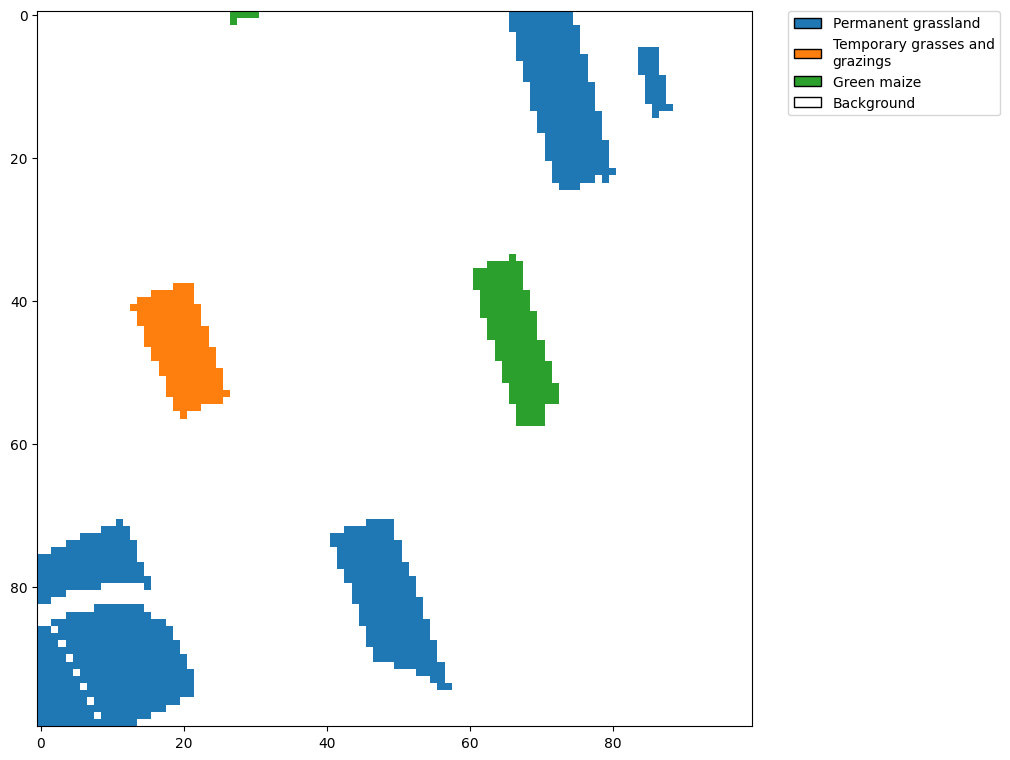

In [25]:
y_true, y_pred, y_prob = model.predict(dataset=test_dataset,)

eopatches_path = "/home/dkocev/data/CropTypeNetherlands/2019/eopatches/"
patch = "eopatch_7495"

fig = display_eopatch_predictions(
    eopatches_path,
    patch,
    y_pred,
    test_dataset.index,
    y_true,
    test_dataset.mapping,
)